<h1  align="center">CIDM6351-Individual Final Project (30 Points)</h1>

<h2  align="center"> <font color="red">Due date: 04/21/2023 11:59 PM CST </font> </h2>

### Estimated Time of Completion: 10 hours
### Save a copy to your Google Drive and answer on your copy
### Submit the share link of your JupyterNotebook to WTClass

# 1. Introduction to the project

Assume that we are asked to prepare data for business analysis tasks for an e-commerce website. Following are schemas of different data sources including: data generated by the e-commerce website, and product ratings collected from the thrid-party platform. Please follow the instruction to prepare data using Data ETL process. (**All data used in this project are fake data generated by a computer program, some records may defy common sense.**)

- Most questions are similar to lecture examples/assignments. Some questions need students to do research and get answers with help of Google & Pandas Document
- The project has 7 tasks (questions), and each task has a post thread on Discussion Board for Q&A.
- All project questions should be posted to the Discussion Board. Please do not email code errors/bugs to the instructor directly.
- The final project is 30 points in total, which is 30% of the final weighted grade (100 points).
- This is an individual project, but students are encouraged to help classmates & exchange ideas with classmates.
- Students will have two weeks to complete this final project. The project would take about 10 hours, but may vary based on students’ different programming backgrounds. **Please plan work and schedule time reasonably.**

## <font color="red"> SQL Database: MySQL</font>
This database contains fundamental data of the e-commerce website.

- **Customers Table**
  - customerID: INT
  - cutomerName: TEXT
  - customerAddress: TEXT
  - customerEmail: TEXT

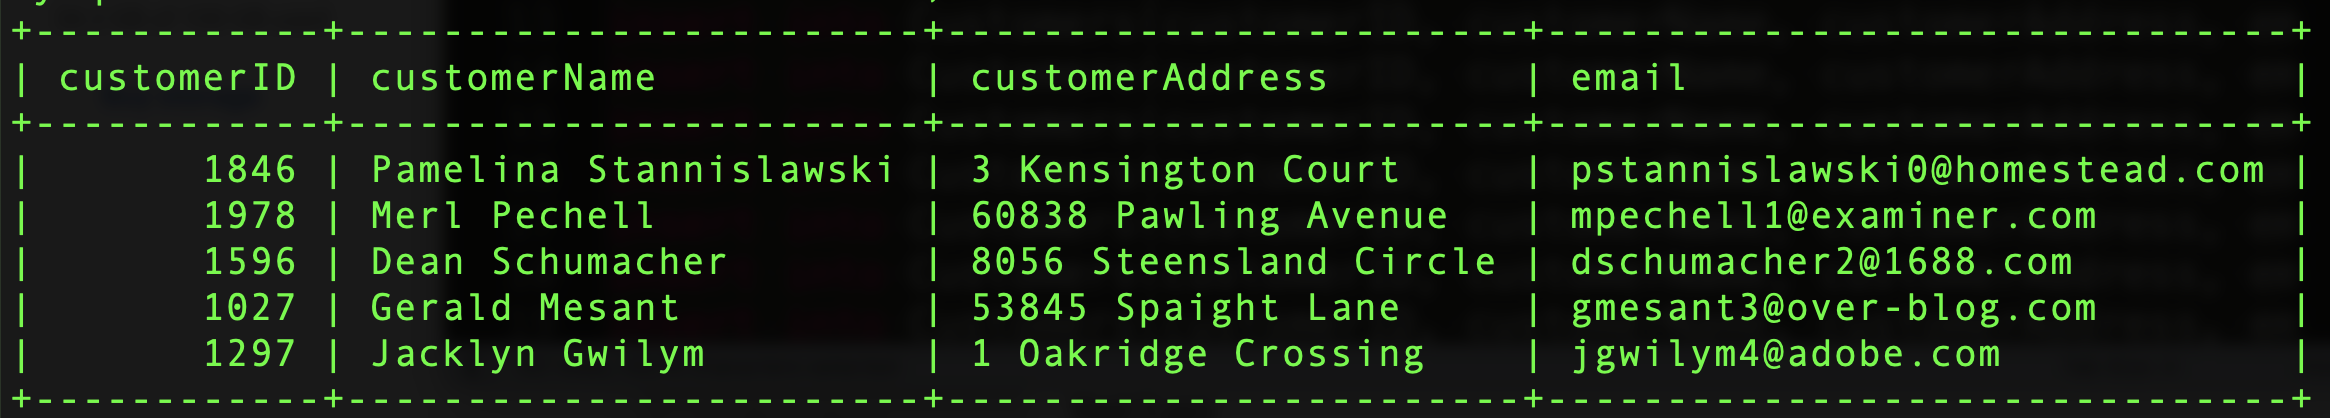


- **Products Table**
  - productID: INT
  - productName: TEXT
  - productPrice: DECIMAL (the price for a single unit of a product)
  - productOrigin: TEXT (the States of the USA where product comes from)
  - productSellBy: DATE (Expiration Date in YYYY-MM-DD format)

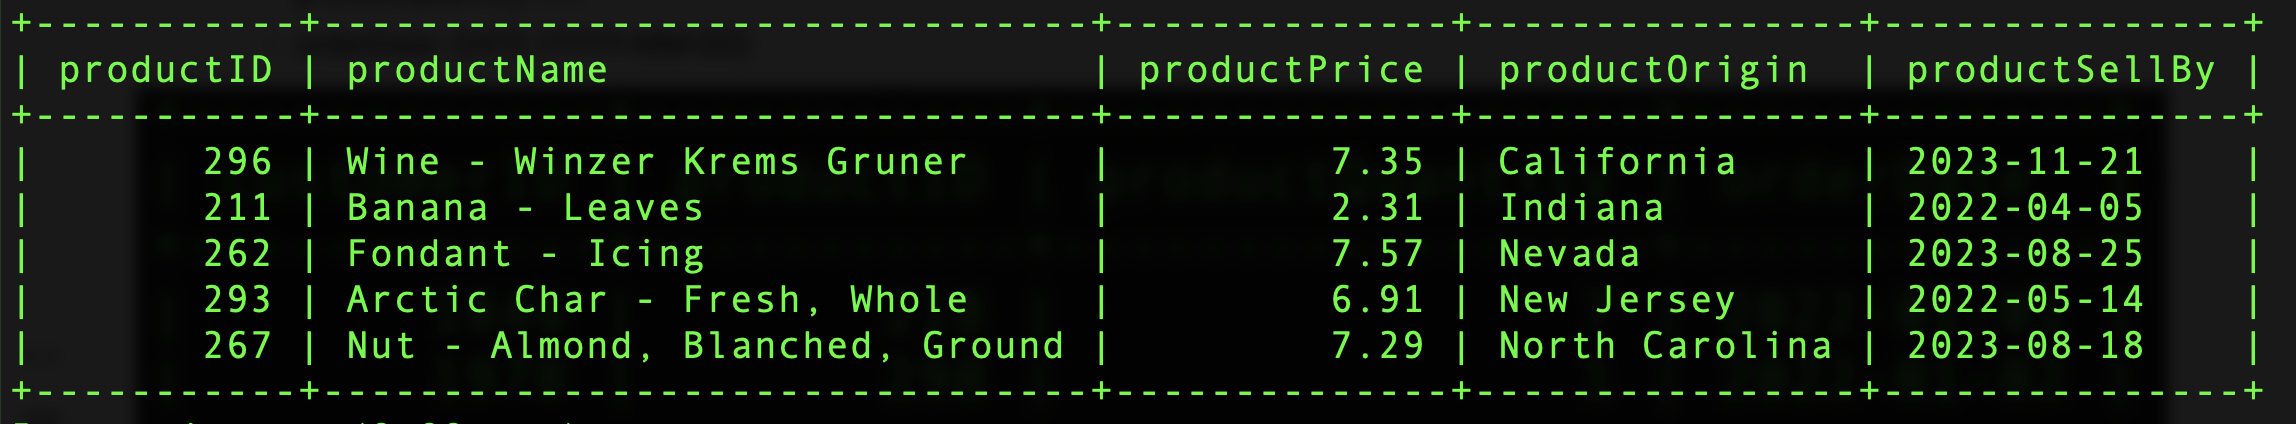

- **Orders Table**
  - customerID: INT (customerIDs from Customers table)
  - productID: INT (productIDs from Products table)
  - productQuantity: INT (the quantity of a product purchased by the customer)
  - orderDate: DATE (the date when the order is placed in YYYY-MM-DD format)

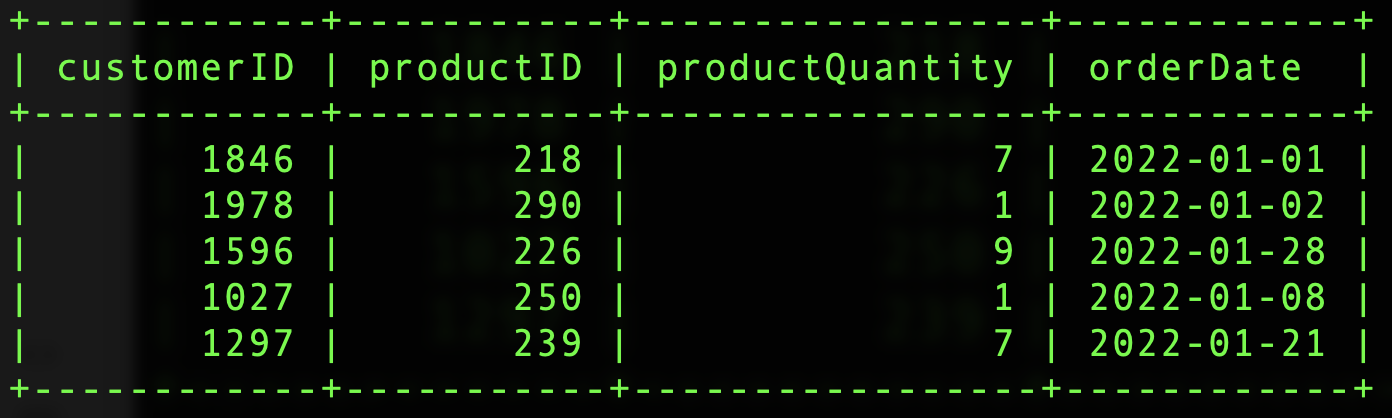

## <font color="red"> File: JSON</font>
This JSON file contains product ratings exported from eCommerce website with scales: 0 (Highly Dissatisfied) - 4 (Highly Satisfied). The key **productName** matches values of productName column in **Products** table.

```json
  [
    {
      "productName": "Wine - Winzer Krems Gruner",
      "rating": 3
    },
    {
      "productName": "Banana - Leaves",
      "rating": 4
    },
    {
      "productName": "Fondant - Icing",
      "rating": 3
    }
  ]
```

## <font color="red"> File: CSV</font>
This flat file contains product ratings collected from third-party platfroms (e.g.: Yelp, Google) with different rating scales.  The key productName matches values of productName column in Products table
* Highly Satisfied
* Satisfied
* Neutral
* Dissatisfied
* Highly Dissatisfied
```
productName, rating,
Milk, Neutral
Milk, Highly Dissatisfied
Milk, Neutral
```

# 2. Data ETL Process

In this section, we will read data from various data sources into pandas Dataframes. Then, following the Task requirements to process data and get final results.



## 2.1 Extract data from JSON,CSV AND SQLite database files

**Download JSON,CSV AND SQLite database files**

In [ ]:
# Run this code cell to download JSON,CSV AND SQLite database files
!wget 'https://raw.githubusercontent.com/BuffTechTalk/CIDM6351/main/finalProject/productRating.json'
!wget 'https://raw.githubusercontent.com/BuffTechTalk/CIDM6351/main/finalProject/externalRating.csv'
!wget 'https://github.com/BuffTechTalk/CIDM6351/raw/main/finalProject/eCommerce.db'

--2023-04-08 15:53:09--  https://raw.githubusercontent.com/BuffTechTalk/CIDM6351/main/finalProject/productRating.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 268005 (262K) [text/plain]
Saving to: ‘productRating.json’

productRating.json  100%[===================>] 261.72K  --.-KB/s    in 0.04s   

2023-04-08 15:53:09 (7.25 MB/s) - ‘productRating.json’ saved [268005/268005]

--2023-04-08 15:53:09--  https://raw.githubusercontent.com/BuffTechTalk/CIDM6351/main/finalProject/externalRating.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 

In [ ]:
# import packages to read sqlite database file with pandas
import sqlite3 as sql
import pandas as pd
import datetime

- **Read CSV file**

In [ ]:
df_csv = pd.read_csv('https://raw.githubusercontent.com/BuffTechTalk/CIDM6351/main/finalProject/externalRating.csv')
df_csv.head(5)

,productName,externalRating
0,Wine - Winzer Krems Gruner,NaN
1,Banana - Leaves,Neutral
2,Fondant - Icing,NaN
3,"Arctic Char - Fresh, Whole",Dissatisfied
4,"Nut - Almond, Blanched, Ground",Satisfied


In [ ]:
# read csv file and show first 5 rows
# put your code below

,productName,externalRating
0,Wine - Winzer Krems Gruner,NaN
1,Banana - Leaves,Neutral
2,Fondant - Icing,NaN
3,"Arctic Char - Fresh, Whole",Dissatisfied
4,"Nut - Almond, Blanched, Ground",Satisfied


- **Read JSON file**

In [ ]:
df_json = pd.read_json('https://raw.githubusercontent.com/BuffTechTalk/CIDM6351/main/finalProject/productRating.json')
df_json.head(5)

,productName,rating
0,Wine - Winzer Krems Gruner,3
1,Banana - Leaves,4
2,Fondant - Icing,3
3,"Arctic Char - Fresh, Whole",3
4,"Nut - Almond, Blanched, Ground",1


In [ ]:
# read json file and show first 5 rows
# put your code below





,productName,rating
0,Wine - Winzer Krems Gruner,3
1,Banana - Leaves,4
2,Fondant - Icing,3
3,"Arctic Char - Fresh, Whole",3
4,"Nut - Almond, Blanched, Ground",1


- **Read tables from ```eCommerce.db``` SQLite database**
  - Products table
  - Customers table
  - Orders table

1. Connect to the database ```eCommerce.db``` with python package sqlite3.

2. There are three tables in the db file. You may use separate dataframes to read data from different tables. E.g: ```df_products``` is content from Products table.
3. Check the datatype of columns in each dataframe, especially the date columns
**Hint: Python+SQLite+Pandas: https://projectcodeed.blogspot.com/2020/10/python-pandas-and-sqlite.html**

In [ ]:
!pip3 install mysql-connector-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 51.3 MB/s eta 0:00:00


In [ ]:
db_sql = 'https://github.com/BuffTechTalk/CIDM6351/raw/main/finalProject/eCommerce.db'

conn = sql.connect('eCommerce.db')
query = pd.read_sql_query("SELECT * FROM products LIMIT 5", conn)

query





,productID,productName,productPrice,productOrigin,productSellBy
0,296,Wine - Winzer Krems Gruner,7.35,California,2023-11-21
1,211,Banana - Leaves,2.31,Indiana,2022-04-05
2,262,Fondant - Icing,7.57,Nevada,2023-08-25
3,293,"Arctic Char - Fresh, Whole",6.91,New Jersey,2022-05-14
4,267,"Nut - Almond, Blanched, Ground",7.29,North Carolina,2023-08-18


In [ ]:
# Read Products table
# put your code below




,productID,productName,productPrice,productOrigin,productSellBy
0,296,Wine - Winzer Krems Gruner,7.35,California,2023-11-21
1,211,Banana - Leaves,2.31,Indiana,2022-04-05
2,262,Fondant - Icing,7.57,Nevada,2023-08-25
3,293,"Arctic Char - Fresh, Whole",6.91,New Jersey,2022-05-14
4,267,"Nut - Almond, Blanched, Ground",7.29,North Carolina,2023-08-18


In [ ]:
query = pd.read_sql_query("SELECT * FROM customers LIMIT 5", conn)
query

,customerID,customerName,customerAddress,email
0,1846,Pamelina Stannislawski,3 Kensington Court,pstannislawski0@homestead.com
1,1978,Merl Pechell,60838 Pawling Avenue,mpechell1@examiner.com
2,1596,Dean Schumacher,8056 Steensland Circle,dschumacher2@1688.com
3,1027,Gerald Mesant,53845 Spaight Lane,gmesant3@over-blog.com
4,1297,Jacklyn Gwilym,1 Oakridge Crossing,jgwilym4@adobe.com


In [ ]:
# Read Customers table
# put your code below




,customerID,customerName,customerAddress,email
0,1846,Pamelina Stannislawski,3 Kensington Court,pstannislawski0@homestead.com
1,1978,Merl Pechell,60838 Pawling Avenue,mpechell1@examiner.com
2,1596,Dean Schumacher,8056 Steensland Circle,dschumacher2@1688.com
3,1027,Gerald Mesant,53845 Spaight Lane,gmesant3@over-blog.com
4,1297,Jacklyn Gwilym,1 Oakridge Crossing,jgwilym4@adobe.com


In [ ]:
query = pd.read_sql_query("SELECT * FROM orders LIMIT 5", conn)
query

,customerID,productID,productQuantity,orderDate
0,1846,218,7,2022-01-01
1,1978,290,1,2022-01-02
2,1596,226,9,2022-01-28
3,1027,250,1,2022-01-08
4,1297,239,7,2022-01-21


In [ ]:
# Read Orders table
# put your code below





,customerID,productID,productQuantity,orderDate
0,1846,218,7,2022-01-01
1,1978,290,1,2022-01-02
2,1596,226,9,2022-01-28
3,1027,250,1,2022-01-08
4,1297,239,7,2022-01-21


## 2.2: Business Tasks

<h4  align="center">
<font color="red">
⚠ No sample results are provided for following tasks. </font> </h4>

- Please follow task requirements to process the data based on your own understanding.
- Add comments to explain the logic/steps you used in the solution. You can add comment in the code lines or at the beginning of your solution.
- The comments could help you organize your solution and help instructor to understand your solution.
- If you did not know how to implement a solution in Python code, put your ideas in the comments. You can still get partial points if the ideas are reasonable.





### **Task 1 (2 points): Count the number of products provided by each productOrigin (State). Show productOrigin and Count**

In [ ]:
# put your code below

# created a SQL query to filter this based on the question

task1_query = """
SELECT productOrigin, COUNT(*)
FROM products
GROUP BY productOrigin
"""

# executed the query created above

task1_execute = pd.read_sql_query(task1_query, conn)
task1_execute



,productOrigin,COUNT(*)
0,Alabama,1
1,Arizona,3
2,California,11
3,Colorado,2
4,Connecticut,1
5,District of Columbia,3
6,Florida,7
7,Georgia,6
8,Idaho,1
9,Illinois,1


### **Task 2 (2 points): Find the products that are expired after March 31, 2022 (productSellBy < April 1, 2022). Show their productName and productSellBy date**

In [ ]:
# put your code below

# created a SQL query to filter this based on the question

task2_query = """
SELECT productName, productSellBy
FROM products
WHERE productSellBy <= '2022-04-01'
"""

# executed the query created above

task2_execute = pd.read_sql_query(task2_query, conn)
task2_execute




,productName,productSellBy
0,Cake - Mini Potato Pancake,2022-03-18
1,Chocolate - Liqueur Cups With Foil,2022-03-05
2,Pie Filling - Cherry,2022-01-31
3,Extract - Raspberry,2022-02-18
4,Cheese - Goat With Herbs,2022-01-13
5,Table Cloth 62x120 White,2022-03-03
6,Wine - Sogrape Mateus Rose,2022-03-07
7,Bay Leaf Fresh,2022-01-05
8,Buffalo - Tenderloin,2022-02-24
9,Milk - 2% 250 Ml,2022-02-22


### **Task 3 (5 points): Find the top 10 best selling products in January 2022 (yyyy-mm-dd: 2022-01-01 to 2022-01-31). The results should show following columns:**
- productName
- totalQuantity (the sum of productQuantity for orders of a product)
- productPrice
- totalSales (productPrice * totalQuantity)

In [ ]:
# put your code below

# created a SQL query to filter this based on the question

# task3_query_old = """
# SELECT
#   productName,
#   SUM(productQuantity) AS totalQuantity,
#   productPrice,
#   SUM(productQuantity)*productPrice AS totalSales
# FROM products, orders
# WHERE
#   products.productID = orders.productID AND
#   orderDate BETWEEN '2022-01-01' AND '2022-01-31'
# LIMIT 10;
# """

# i originally had an issue defining the totalSales. after some research, i
# found out you can not "re-use" columns that you have created them in your select statement
# that is why we had to create a subquery to make the totalSales column work.
# my previous query is also commented above to see how they differed.

task3_query = """
SELECT
  productName,
  productPrice,
  totalQuantity,
  productPrice*totalQuantity AS totalSales
FROM (
  SELECT
    products.productName,
    products.productPrice,
    SUM(orders.productQuantity) AS totalQuantity
  FROM products
  JOIN orders ON products.productID = orders.productID
  WHERE orderDate BETWEEN '2022-01-01' AND '2022-01-31'
  GROUP BY products.productName, products.productPrice
) sub
ORDER BY totalSales DESC
LIMIT 10;
"""

# executed the query created above

task3_execute = pd.read_sql_query(task3_query, conn)
task3_execute






,productName,productPrice,totalQuantity,totalSales
0,Onions - Cippolini,9.77,46,449.42
1,"Soup - Campbells, Chix Gumbo",8.65,49,423.85
2,Cheese - Swiss Sliced,9.81,42,412.02
3,"Mushroom - Shitake, Dry",7.03,51,358.53
4,Chutney Sauce - Mango,8.08,42,339.36
5,Crackers - Soda / Saltins,7.47,45,336.15
6,Squash - Butternut,9.67,34,328.78
7,Pie Filling - Cherry,9.63,34,327.42
8,"Nut - Almond, Blanched, Sliced",8.70,37,321.90
9,Olives - Kalamata,4.83,62,299.46


### **Task 4 (5 points): Find all Wine (productName contains 'Wine') from Products table. Calculate the totalSales for each wine and sort results in descending order based on the totalSales.  The results should show following columns:**
- productName (productName contains Wine)
- productPrice (unit price of the Wine)
- totalQuantity (sum of productQuantity in orders of a Wine product)
- totalSales  (productPrice * totalQuantity)

In [ ]:
# put your code below

# this was one was very similar to the last problem

task4_query = """
SELECT
  productName,
  productPrice,
  totalQuantity,
  productPrice*totalQuantity AS totalSales
FROM (
  SELECT
    products.productName,
    products.productPrice,
    SUM(orders.productQuantity) AS totalQuantity
  FROM products
  JOIN orders ON products.productID = orders.productID
  WHERE productName LIKE '%Wine%'
  GROUP BY products.productName, products.productPrice
) sub
ORDER BY totalSales DESC;
"""

# executed the query created above

task4_execute = pd.read_sql_query(task4_query, conn)
task4_execute





,productName,productPrice,totalQuantity,totalSales
0,Rice Wine - Aji Mirin,7.53,46,346.38
1,"Wine - Red, Black Opal Shiraz",7.71,34,262.14
2,"Wine - White, Lindemans Bin 95",9.68,22,212.96
3,Wine - Vouvray Cuvee Domaine,4.58,38,174.04
4,"Wine - Red, Concha Y Toro",5.44,26,141.44
5,Wine - Marlbourough Sauv Blanc,1.97,56,110.32
6,Wine - Sogrape Mateus Rose,4.10,26,106.60
7,"Wine - Sherry Dry Sack, William",5.01,21,105.21
8,Wine - Valpolicella Masi,5.76,18,103.68
9,Wine - Barossa Valley Estate,1.65,56,92.40


### **Task 5 (5 points): Find the top 10 customers based on their total spendings in January 2022. The results should show following columns:**
- customerName
- email
- totalSpendings

In [ ]:
# put your code below

task5_query = """
SELECT
  c.customerName,
  c.email,
  SUM(o.productQuantity * p.productPrice) AS totalSpendings
FROM customers c
JOIN orders o ON c.customerID = o.customerID
JOIN products p ON o.productID = p.productID
WHERE o.orderDate BETWEEN '2022-01-01' AND '2022-01-31'
GROUP BY c.customerID, c.customerName, c.email
ORDER BY totalSpendings DESC
LIMIT 10;
"""

# executed the query created above

task5_execute = pd.read_sql_query(task5_query, conn)
task5_execute




,customerName,email,totalSpendings
0,Rochell Meaddowcroft,rmeaddowcroft2o@bandcamp.com,384.00
1,Sid Rising,srisings@tiny.cc,339.25
2,Cyrus Bolliver,cbolliver1x@alibaba.com,293.09
3,Bibbie Critchley,bcritchley1r@sogou.com,280.99
4,Pam Pudding,ppudding19@rakuten.co.jp,278.73
5,Kala Gilleson,kgilleson5@merriam-webster.com,268.01
6,Burr de Marco,bde1n@youtu.be,259.74
7,Kerstin Mossman,kmossman1d@dot.gov,248.18
8,Beatrix Cudbird,bcudbird25@forbes.com,244.52
9,Deanna Hendrichs,dhendrichs1o@nih.gov,244.42


### **Task 6 (6 points): Calculate the average rating (including website rating and external rating) for each product. The results should show following columns:**
- productName
- averageRating for each product

And sort results by averageRating in descending order.

In [ ]:
# Load the Products table from SQL into a Pandas dataframe
products_df = pd.read_sql("SELECT * FROM Products", conn)

json_file = 'https://raw.githubusercontent.com/BuffTechTalk/CIDM6351/main/finalProject/productRating.json'
csv_file = 'https://raw.githubusercontent.com/BuffTechTalk/CIDM6351/main/finalProject/externalRating.csv'

# Load the product ratings from the JSON file into a Pandas dataframe
with open('productRating.json') as f:
    product_ratings = json.load(f)
product_ratings_df = pd.DataFrame(product_ratings)

# Load the product ratings from the CSV file into a Pandas dataframe
product_ratings_csv_df = pd.read_csv('externalRating.csv')

# Merge the product ratings from the JSON and CSV files into a single dataframe
product_ratings_merged_df = pd.concat([product_ratings_df, product_ratings_csv_df])

# Calculate the average rating for each product
avg_ratings_df = product_ratings_merged_df.groupby("productName").mean().reset_index()

# Merge the average ratings with the Products table based on productName
result_df = pd.merge(products_df, avg_ratings_df, on="productName")

# Sort the results by averageRating in descending order
result_df = result_df.sort_values("rating", ascending=False)

# Display the results
print(result_df[["productName", "rating"]])



                       productName    rating
35              Bar Bran Honey Nut  2.619048
47        Beef - Top Sirloin - Aaa  2.523810
60  Nut - Almond, Blanched, Sliced  2.500000
0       Wine - Winzer Krems Gruner  2.428571
48              Beef - Tender Tips  2.428571
..                             ...       ...
85        Wine - Valpolicella Masi  1.738095
10                    Puree - Kiwi  1.738095
6                    Leeks - Large  1.714286
20                     Soy Protein  1.666667
55    Wine - Barossa Valley Estate  1.476190

[97 rows x 2 columns]


### **Task 7 (5 points): Calculate the daily sales for days in January 2022 (2022-01-01 to 2022-01-31). Plot the daily sales in a line chart.**

In [ ]:
# put your code below

import plotly.express as px


# Load the Orders table from SQL into a Pandas dataframe
orders_df = pd.read_sql("SELECT * FROM Orders", conn)

# Filter the orders for January 2022
jan_2022_orders_df = orders_df[(orders_df['orderDate'] >= '2022-01-01') & (orders_df['orderDate'] <= '2022-01-31')]

# Calculate the daily sales
daily_sales_df = jan_2022_orders_df.groupby('orderDate').sum()['productQuantity'].reset_index()

# Plot the daily sales in a line chart
fig = px.line(daily_sales_df, x='orderDate', y='productQuantity', title='Daily Sales in January 2022')
fig.show()




